In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
import phuzzy
import phuzzy as ph
from phuzzy.mpl import mix_mpl

In [3]:
import phuzzy.contrib.shgo


In [4]:
def f(x):
    return (x - 30) * np.sin(x)
def fm(x):
    return -1 * f(x)

In [5]:
x_bound = (0, 100)
res = phuzzy.contrib.shgo.shgo(func=fm, bounds=[x_bound], iters=6, n=1)
res

     fun: -65.82617096739044
    funl: array([-65.82617097, -59.54378682, -53.26159157, -46.97966091,
       -40.6981172 , -34.41717193, -28.13722481, -25.30735529,
       -21.85913263, -19.03066897, -15.58512061, -12.76032486,
        -9.32328392,  -6.51407968,  -3.13996043,   0.        ])
 message: 'Optimization terminated successfully.'
    nfev: 284
     nit: 6
   nlfev: 251
   nlhev: 0
   nljev: 78
 success: True
       x: array([95.83376452])
      xl: array([[95.83376452],
       [89.55218103],
       [83.27097503],
       [76.99029775],
       [70.71039349],
       [64.43168421],
       [58.15496682],
       [ 4.67292607],
       [51.88194669],
       [10.94314801],
       [45.61703858],
       [17.20078817],
       [39.37615998],
       [23.41131905],
       [33.28244135],
       [ 0.        ]])

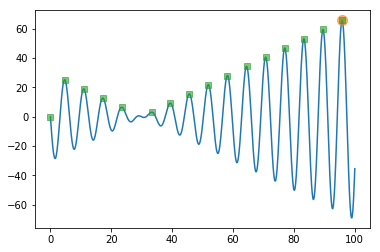

In [6]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=1)
x = np.linspace(x_bound[0], x_bound[1], 1000)
y = f(x)
ax.plot(x, y)
ax.plot(res.x, f(res.x), "o", alpha=.6, ms=10)
ax.plot(res.xl, f(res.xl), "s", alpha=.6, ms=6)

(0, 1)

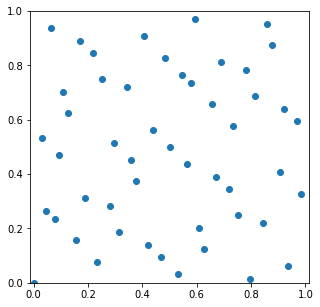

In [32]:
import shgo.shgo_m.sobol_seq as sobol_seq
sobol = sobol_seq.Sobol()
d=2
n=50
points = pd.DataFrame(sobol.i4_sobol_generate(d, n, skip=0), columns=["x", "y"])
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))
ax.scatter(points.x, points.y)
ax.set_aspect("equal", "datalim")
ax.set_xlim(0,1)
ax.set_ylim(0,1)

(0, 1)

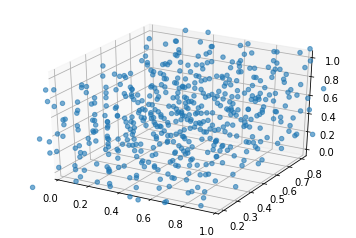

In [38]:
import shgo.shgo_m.sobol_seq as sobol_seq
sobol = sobol_seq.Sobol()
d=3
n=500
points = pd.DataFrame(sobol.i4_sobol_generate(d, n, skip=0), columns=["x", "y", "z"])
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points.x, points.y, points.z, alpha=.6)
ax.set_aspect("equal", "datalim")
ax.set_xlim(0,1)
ax.set_ylim(0,1)